In [1]:
import sys, json
sys.path.insert(0, r'C:\Users\tglaubach\repos\pydocmaker\src')

In [2]:
import pydocmaker as pyd

# Example on how to Export Reports

This example is based on the last example `01_example_build_doc.ipynb` but can also be read individually.

## Let's Build an Example Document To Export

In [3]:
doc = pyd.DocBuilder()
doc.add_chapter('Introduction')
doc.add('dummy text which will be added to the introduction')
doc.add_kw('verbatim', 'def hello_world():\n   print("hello world!")')
doc.add_chapter('Second Chapter')
doc.add_kw('markdown', 'This is my fancy `markdown` text for the Second Chapter')
doc.add_image("https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png")
doc.show()

## Using the Export function to create reports

### Export to a single format

Either write to a file like this (format will be auto detected from filename):

In [4]:
import tempfile, os, datetime
with tempfile.TemporaryDirectory() as tmpdir:
    doc.export(tmpdir + '/myfile.html')
    print(os.listdir(tmpdir))


['myfile.html']


In [5]:
# give a string for path_or_stream to save to a file instead
md_txt = doc.export('md', path_or_stream=None)
print(md_txt[:200] + '...\n(rest omitted for brevity)')

## Introduction



dummy text which will be added to the introduction



```
def hello_world():
   print("hello world!")
```



## Second Chapter



This is my fancy `markdown` text for the Second Cha...
(rest omitted for brevity)


### Export to all formats

In [6]:
dc = doc.export_many()

for key, v in dc.items():
    if isinstance(v, tuple):
        v = v[0]
    print(f'{key=}, {type(v)=}, {v[:20]=}, ...')
    

key='exported_report.md', type(v)=<class 'str'>, v[:20]='## Introduction\n\n\n\nd', ...
key='exported_report.html', type(v)=<class 'str'>, v[:20]='<h2>Introduction</h2', ...
key='exported_report.json', type(v)=<class 'str'>, v[:20]='[\n    {\n        "typ', ...
key='exported_report.docx', type(v)=<class 'bytes'>, v[:20]=b'PK\x03\x04\x14\x00\x00\x00\x08\x00/~%Y\xfc\xa7\xae\xd0\x9b\x01', ...
key='exported_report.textile.zip', type(v)=<class 'str'>, v[:20]='h2.  Introduction\n\n\n', ...
key='exported_report.ipynb', type(v)=<class 'str'>, v[:20]='{\n  "cells": [\n    {', ...
key='exported_report.tex.zip', type(v)=<class 'str'>, v[:20]='\n\n\\section{Introduct', ...
key='exported_report.redmine', type(v)=<class 'str'>, v[:20]='h2.  Introduction\n\n\n', ...


# Export document to all possible formats and save them in a directory

In [7]:
import tempfile, os, datetime
with tempfile.TemporaryDirectory() as tmpdir:
    dc = doc.export_all(tmpdir)


    print('\n')
    print('This shows the filenames and if writing was successfull!')
    for k, v in dc.items():
        print(k.ljust(80, '.'), v)

    print('\n')
    print('PATH'.ljust(80, ' ') + ' |' + str('SIZE').rjust(10, ' ') + ' bytes | LAST TIME MODIFIED')
    print(''.ljust(80, '-') + ' +' + str('').rjust(17, '-') + '+' + ''.ljust(30,'-'))
    for entry in os.listdir(tmpdir):
        entry_path = os.path.join(tmpdir, entry)
        file_size = os.path.getsize(entry_path)
        modified_time = os.path.getmtime(entry_path)
        print(entry_path.ljust(80, ' ') + ' |' + str(file_size).rjust(10, ' ') + ' bytes | ' + datetime.datetime.fromtimestamp(modified_time).isoformat())







This shows the filenames and if writing was successfull!
C:\Users\TGLAUB~1\AppData\Local\Temp\tmpa1q3gajl\exported_report.md............. True
C:\Users\TGLAUB~1\AppData\Local\Temp\tmpa1q3gajl\exported_report.html........... True
C:\Users\TGLAUB~1\AppData\Local\Temp\tmpa1q3gajl\exported_report.json........... True
C:\Users\TGLAUB~1\AppData\Local\Temp\tmpa1q3gajl\exported_report.docx........... True
C:\Users\TGLAUB~1\AppData\Local\Temp\tmpa1q3gajl\exported_report.textile.zip.... True
C:\Users\TGLAUB~1\AppData\Local\Temp\tmpa1q3gajl\exported_report.ipynb.......... True
C:\Users\TGLAUB~1\AppData\Local\Temp\tmpa1q3gajl\exported_report.tex.zip........ True


PATH                                                                             |      SIZE bytes | LAST TIME MODIFIED
-------------------------------------------------------------------------------- +-----------------+------------------------------
C:\Users\TGLAUB~1\AppData\Local\Temp\tmpa1q3gajl\exported_report.docx            |    

# Export as Markdown

In [8]:
# either get the markdown string like this

md_str = doc.to_markdown(embed_images=False)

print(md_str[:200] + '...\n(rest omitted for brevity)')

## Introduction



dummy text which will be added to the introduction



```
def hello_world():
   print("hello world!")
```



## Second Chapter



This is my fancy `markdown` text for the Second Cha...
(rest omitted for brevity)


## Introduction



dummy text which will be added to the introduction



```
def hello_world():
   print("hello world!")
```



## Second Chapter



This is my fancy `markdown` text for the Second Chapter





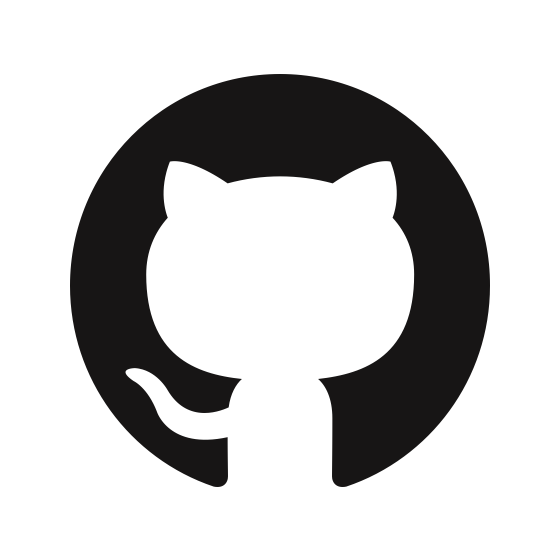

*caption:* None





In [9]:
#you can show the markdown string directly like this

from IPython.display import display, HTML, Markdown
md_str = doc.to_markdown()
display(Markdown(md_str))

In [10]:
# this would save to the path 'path/to/my_file.md' (if that direcory would exist) and return True on success
# doc.to_markdown('path/to/my_file.md')

In [11]:
import io
# we can also save to stream like this
with io.StringIO() as fp:
    doc.to_markdown(fp)

    # get the text from stream
    fp.seek(0)
    md_str = fp.read()
    print(md_str[:200] + '...\n(rest omitted for brevity)')

## Introduction



dummy text which will be added to the introduction



```
def hello_world():
   print("hello world!")
```



## Second Chapter



This is my fancy `markdown` text for the Second Cha...
(rest omitted for brevity)


## Export as HTML

In [12]:
# either get the HTML as string like this

html_str = doc.to_html()

print(html_str[:200] + '...\n(rest omitted for brevity)')

<h2>Introduction</h2>

<div>dummy text which will be added to the introduction</div>

<div style="min-width:100;"></div>

<pre>def hello_world():
   print("hello world!")</pre>

<h2>Second Chapter</h2...
(rest omitted for brevity)


In [13]:
# this would save to the path 'path/to/my_file.html' (if that direcory would exist) and return True on success
# doc.to_html('path/to/my_file.html')

In [14]:
import io
# we can also save to stream like this
with io.StringIO() as fp:
    doc.to_html(fp)

    # get the text from stream
    fp.seek(0)
    html_str = fp.read()
    print(html_str[:200] + '...\n(rest omitted for brevity)')

<h2>Introduction</h2>

<div>dummy text which will be added to the introduction</div>

<div style="min-width:100;"></div>

<pre>def hello_world():
   print("hello world!")</pre>

<h2>Second Chapter</h2...
(rest omitted for brevity)


## Export as docx

In [15]:
# this gets the docx content as bytes
docx_bts = doc.to_docx()
print(len(docx_bts))

# this would save to the path 'path/to/my_file.docx' (if that direcory would exist) and return True on success
# doc.to_docx('path/to/my_file.docx')

# NOTE: This also works with streams like above

44233


## Export as tex

In [16]:
# you can get the text and attachments (dict[str, bytes]) directly like this

tex_str, attachments_dc = doc.to_tex()
print(tex_str[:300] + '...\n(rest omitted for brevity)')

print('-'*100)
print('Attachments')
print('-'*100)
for k, attachment_bts in attachments_dc.items():
    print(k, len(attachment_bts), attachment_bts[:100])




\section{Introduction}


dummy text which will be added to the introduction

\begin{tabular}{|p{16cm}|}
\hline
\begin{tiny}\begin{verbatim}
def hello_world():
   print("hello world!")
\end{verbatim}\end{tiny}
\\
\hline
\end{tabular}\par



\section{Second Chapter}



This is my fancy markdown text...
(rest omitted for brevity)
----------------------------------------------------------------------------------------------------
Attachments
----------------------------------------------------------------------------------------------------
inp\GitHub-Mark-ea2971cee799.png 7249 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x020\x00\x00\x020\x08\x03\x00\x00\x00\xaf/\xa1]\x00\x00\x02\xfdPLTE\xff\xff\xff\xfe\xfe\xfe\xfd\xfd\xfd\xfc\xfc\xfc\xfb\xfb\xfb\xfa\xfa\xfa\xfa\xf9\xf9\xf9\xf9\xf9\xf8\xf8\xf8\xf7\xf7\xf7\xf6\xf6\xf6\xf5\xf5\xf5\xf4\xf4\xf4\xf3\xf3\xf3\xf2\xf2\xf2\xf1\xf1\xf1\xf0\xf0\xf0\xf0\xef\xef\xef\xee\xee\xee\xee'


In [17]:
# this would save all tex files to the path 'path/to/my_file.zip' (if that direcory would exist) and return True on success
# doc.to_tex('path/to/my_file.zip')

# NOTE: This also works with streams like above

with io.BytesIO() as fp:
    doc.to_tex(fp)

    # get the bytes from stream
    fp.seek(0)
    zip_bts = fp.read()
    print(zip_bts[:100], '...\n(rest omitted for brevity)')
    

b'PK\x03\x04\x14\x00\x00\x00\x00\x00/~%Ymd\x85\x7fn(\x00\x00n(\x00\x00\x08\x00\x00\x00doc.json[\n    {\n        "typ": "markdown",\n        "children": "## Int' ...
(rest omitted for brevity)


## Export as Textile (redmine native format)

In [18]:
# you can get the text and attachments (dict[str, bytes]) directly like this

textile_str, attachments_dc = doc.to_textile()
print(textile_str[:100] + '...\n(rest omitted for brevity)')

print('-'*100)
print('Attachments')
print('-'*100)
for k, attachment_bts in attachments_dc.items():
    print(f'{k} {len(attachment_bts)=} {type(attachment_bts)=}')


h2.  Introduction



dummy text which will be added to the introduction



<pre>def hello_world():
 ...
(rest omitted for brevity)
----------------------------------------------------------------------------------------------------
Attachments
----------------------------------------------------------------------------------------------------
doc.json len(attachment_bts)=10266 type(attachment_bts)=<class 'str'>
GitHub-Mark-ea2971cee799.png len(attachment_bts)=7249 type(attachment_bts)=<class 'bytes'>


In [19]:
# this would save all textile files to the path 'path/to/my_file.zip' (if that direcory would exist) and return True on success
# doc.to_tex('path/to/my_file.zip')

# NOTE: This also works with streams like above

with io.BytesIO() as fp:
    doc.to_textile(fp)

    # get the bytes from stream
    fp.seek(0)
    zip_bts = fp.read()
    print(zip_bts[:100], '...\n(rest omitted for brevity)')
    

b'PK\x03\x04\x14\x00\x00\x00\x00\x00/~%Yt/r\xc4i\x01\x00\x00i\x01\x00\x00\x0c\x00\x00\x00main.textileh2.  Introduction\n\n\n\ndummy text which will be added to the' ...
(rest omitted for brevity)


# Export as Redmine

In [20]:
# here we can not save to a file, but only return the exported values
text_textile, attachments_lst = doc.to_redmine()

print(text_textile[:100] + '...\n(rest omitted for brevity)')

print('-'*100)
print('Attachments')
print('-'*100)
for a in attachments_lst:
    print(a.get('filename'), type(a.get('path')), a.get('content_type'))

# this we can use to upload to redmine, but not save to a file directly

h2.  Introduction



dummy text which will be added to the introduction



<pre>def hello_world():
 ...
(rest omitted for brevity)
----------------------------------------------------------------------------------------------------
Attachments
----------------------------------------------------------------------------------------------------
GitHub-Mark-ea2971cee799.png <class '_io.BytesIO'> application/octet-stream


# Export as iPython Notebook (ipynb)

In [21]:
# either get the HTML as string like this

ipynb_str = doc.to_ipynb()

print(ipynb_str[:200] + '...\n(rest omitted for brevity)')
# NOTE: This also works with streams like above


{
  "cells": [
    {
      "cell_type": "markdown",
      "metadata": {},
      "source": [
        "## Introduction\n"
      ]
    },
    {
      "cell_type": "raw",
      "metadata": {},
      "sour...
(rest omitted for brevity)
